In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import cv2

In [2]:
x_range = np.arange(-5, 4.0, 0.1)
y_range = np.arange(-5, 5.0, 0.1)
wx, wy = np.meshgrid(x_range, y_range)

In [3]:
# type = '1d_horizontal'
# type = '1d_vertical'
type = '2d'

In [4]:
def draw_hist(type):
    if type == '2d':
        H = (1/100) * (1 + 2 * np.cos(wx) + np.cos(2 * wx)) * (1 + 2 * np.cos(wy) + np.cos(2 * wy))
        h = (1/100) * np.ones(10)
    elif type == '1d_horizontal':
        H = (1/100) * (1 + 2 * np.cos(wx) + np.cos(2 * wx))
        h = (1/10) * np.ones((1, 10))
    elif type == '1d_vertical':
        H = (1/100) * (1 + 2 * np.cos(wy) + np.cos(2 * wy))
        h = (1/10) * np.ones((10, 1))
    return H,h

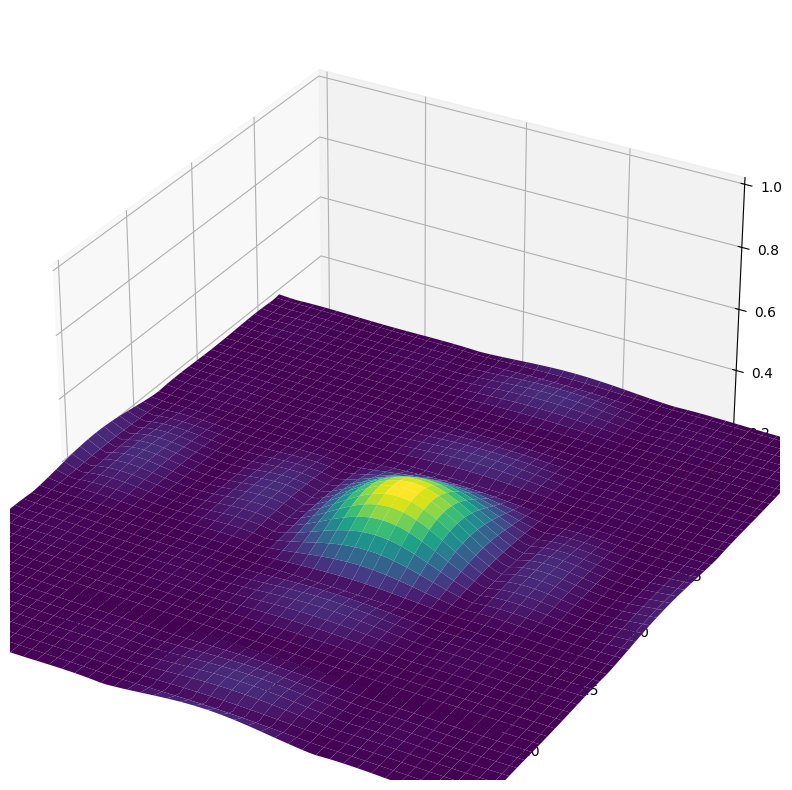

In [5]:
fig = plt.figure(1, figsize=(10, 10))
H,h = draw_hist(type)
ax = fig.add_subplot(111, projection='3d')
ax.set_xticks(np.arange(-1, 1, 1/2))
ax.set_yticks(np.arange(-1, 1, 1/2))
ax.plot_surface(wx/np.pi, wy/np.pi, np.abs(H), cmap='viridis')
array = np.array([-1, 1, -1, 1, 0, 1])
ax.axis(array)

plt.show()

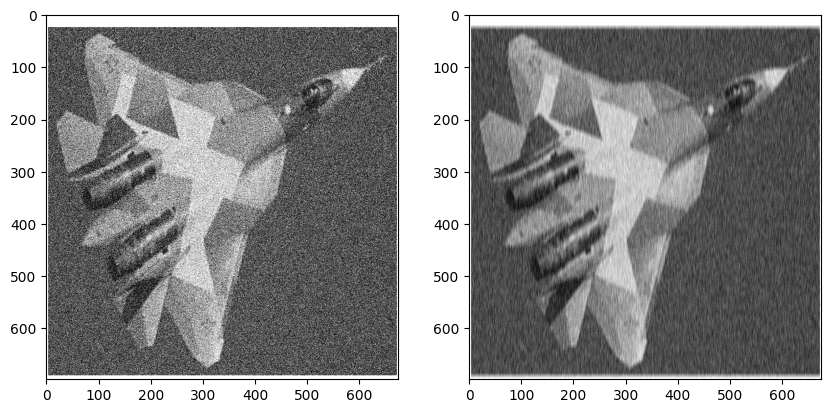

In [6]:
img = ski.io.imread(r'../images/airplane.png', as_gray=True)
filtered_img = cv2.filter2D(img, -1, h, borderType=cv2.BORDER_REFLECT)
_, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(filtered_img, cmap='gray')
plt.show()